In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
wec = pd.read_csv(r"../datasets/wec_1980_sinreg.csv")

In [49]:
# Calcula la media de 'energy_per_capita' y 'gdp' por país
mean_values = wec.groupby('country').agg({'renewables_consumption': 'mean', 'primary_energy_consumption': 'mean', 
'gdp': 'mean', 'population': 'mean'}).reset_index()

# Crea un nuevo DataFrame con las medias por país
df = pd.DataFrame({'country': mean_values['country'],
                          'mean_rc': mean_values['renewables_consumption'],
                          'mean_gdp': mean_values['gdp'],
                          'mean_pec': mean_values['primary_energy_consumption'],
                          'mean_pop': mean_values['population']})

# DBSCAN 2 FEATURES

In [17]:
features = ["gdp", "primary_energy_consumption"]
X = mean_values[features]
X.head(5)

,gdp,primary_energy_consumption
0,3.626833e+10,17.649525
1,1.925028e+10,36.627075
2,3.199250e+11,377.235475
3,5.340000e+11,2.109125
4,5.485567e+10,48.328450


## Eliminando outliers

In [18]:
Q1 = X.quantile(0.10)
Q3 = X.quantile(0.90)
IQR = Q3 - Q1

# Encuentra las posiciones de los outliers
outlier_positions = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)
X_= X[~outlier_positions]
X_.shape



In [22]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X_scal = scale.fit_transform(X_)

c:\Users\Luna\anaconda3\envs\ds-python\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Luna\anaconda3\envs\ds-python\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Luna\anaconda3\envs\ds-python\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Luna\anaconda3\envs\ds-python\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version

In [23]:
pd.DataFrame(X_scal).shape

(205, 2)

In [24]:
from sklearn.cluster import DBSCAN


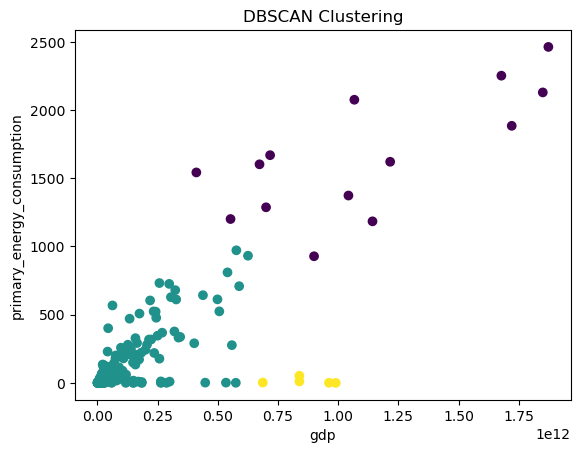

In [27]:

# Aplica DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Puedes ajustar eps y min_samples según tus necesidades
dbscan_labels = dbscan.fit_predict(X_scal)

# Añade las etiquetas al DataFrame original
X_with_labels = pd.DataFrame(X_, columns=X_.columns)
X_with_labels['Cluster'] = dbscan_labels

# Visualización de los clusters
plt.scatter(X_with_labels['gdp'], X_with_labels['primary_energy_consumption'], c=X_with_labels['Cluster'], cmap='viridis')
plt.xlabel('gdp')
plt.ylabel('primary_energy_consumption')
plt.title('DBSCAN Clustering')
plt.show()


Eps= 0,5. Tenemos 3 grupos distintos: El violeta con mediano-alto gdp y alto consumo energético, el amarillo con bajo consumo energético y gdp mediano, y el verde con gdp bajo-mediano y consumo energético bajo-mediano. 

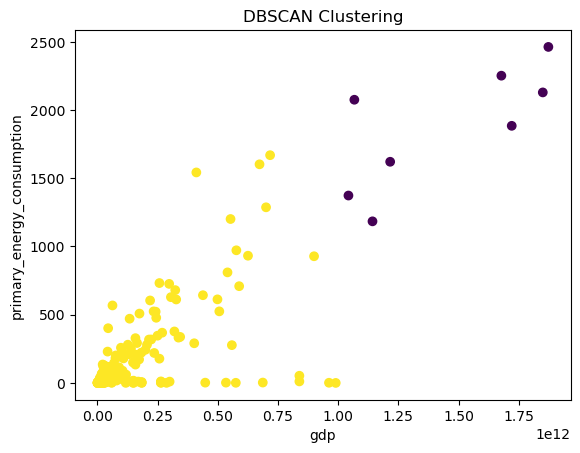

In [31]:

# Aplica DBSCAN
dbscan = DBSCAN(eps=1, min_samples=5)  # Puedes ajustar eps y min_samples según tus necesidades
dbscan_labels = dbscan.fit_predict(X_scal)

# Añade las etiquetas al DataFrame original
X_with_labels = pd.DataFrame(X_, columns=X_.columns)
X_with_labels['Cluster'] = dbscan_labels

# Visualización de los clusters
plt.scatter(X_with_labels['gdp'], X_with_labels['primary_energy_consumption'], c=X_with_labels['Cluster'], cmap='viridis')
plt.xlabel('gdp')
plt.ylabel('primary_energy_consumption')
plt.title('DBSCAN Clustering')
plt.show()


In [30]:
from sklearn.metrics.pairwise import pairwise_distances

avg_distance = pairwise_distances(X_scal).mean()
avg_distance


1.2264067833612369

# DBSCAN 4 features

In [50]:
features = ["gdp", "renewables_consumption", "primary_energy_consumption" , "population"]
X = mean_values[features]
X.head(5)

,gdp,renewables_consumption,primary_energy_consumption,population
0,3.626833e+10,0.714,17.649525,21958825.0
1,1.925028e+10,0.714,36.627075,3026025.0
2,3.199250e+11,0.795,377.235475,30730125.0
3,5.340000e+11,1.923,2.109125,51425.0
4,5.485567e+10,1.923,48.328450,17583950.0


In [51]:
Q1 = X.quantile(0.10)
Q3 = X.quantile(0.90)
IQR = Q3 - Q1

# Encuentra las posiciones de los outliers
outlier_positions = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)
X_= X[~outlier_positions]
X_.shape



(202, 4)

In [52]:
scale = StandardScaler()

X_scal = scale.fit_transform(X_)

c:\Users\Luna\anaconda3\envs\ds-python\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Luna\anaconda3\envs\ds-python\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Luna\anaconda3\envs\ds-python\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Luna\anaconda3\envs\ds-python\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version

In [53]:
from sklearn.metrics.pairwise import pairwise_distances

avg_distance = pairwise_distances(X_scal).mean()
avg_distance


2.110646684005446

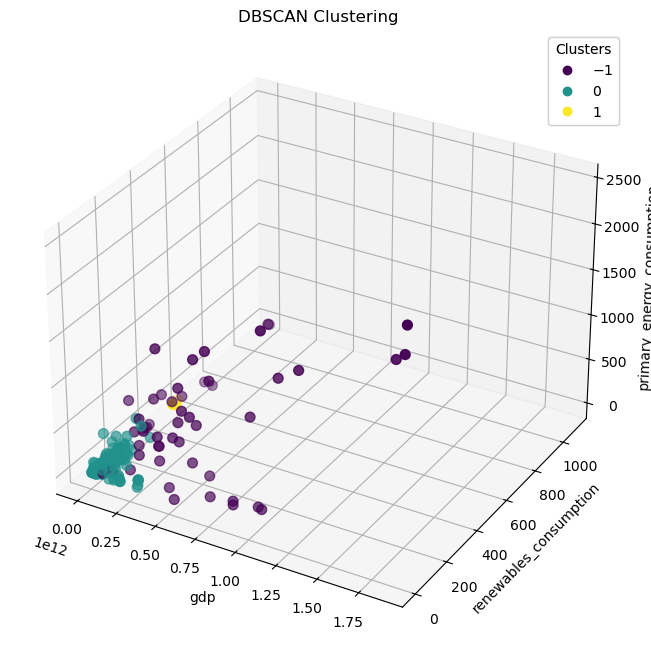

In [55]:

# features = ["gdp", "energy_per_capita", "primary_energy_consumption" , "population"]
# Aplica DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Puedes ajustar eps y min_samples según tus necesidades
dbscan_labels = dbscan.fit_predict(X_scal)

# Añade las etiquetas al DataFrame original
X_with_labels = pd.DataFrame(X_, columns=['gdp', 'renewables_consumption', 'primary_energy_consumption', 'population'])
X_with_labels['Cluster'] = dbscan_labels

# Visualización de los clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_with_labels['gdp'], X_with_labels['renewables_consumption'], X_with_labels['primary_energy_consumption'],
                     c=X_with_labels['Cluster'], cmap='viridis', s=50)

ax.set_xlabel('gdp')
ax.set_ylabel('renewables_consumption')
ax.set_zlabel('primary_energy_consumption')
ax.set_title('DBSCAN Clustering')

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()


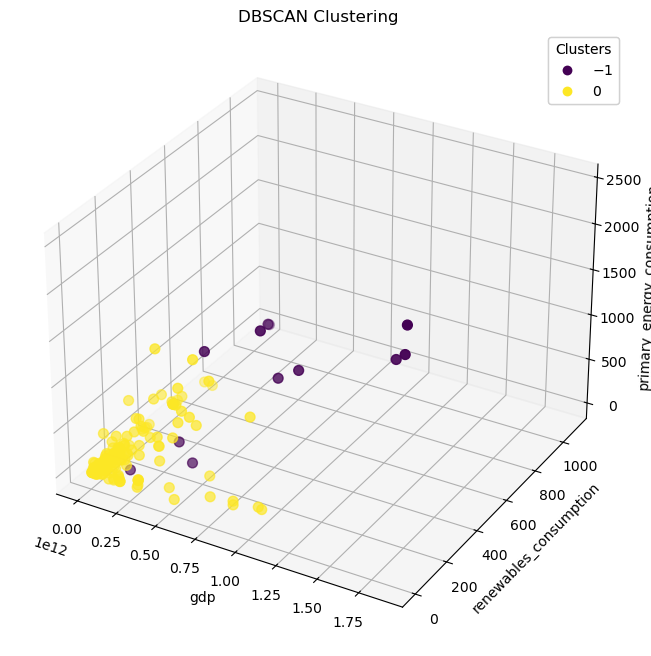

In [56]:

# features = ["gdp", "energy_per_capita", "primary_energy_consumption" , "population"]
# Aplica DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Puedes ajustar eps y min_samples según tus necesidades
dbscan_labels = dbscan.fit_predict(X_scal)

# Añade las etiquetas al DataFrame original
X_with_labels = pd.DataFrame(X_, columns=['gdp', 'renewables_consumption', 'primary_energy_consumption', 'population'])
X_with_labels['Cluster'] = dbscan_labels

# Visualización de los clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_with_labels['gdp'], X_with_labels['renewables_consumption'], X_with_labels['primary_energy_consumption'],
                     c=X_with_labels['Cluster'], cmap='viridis', s=50)

ax.set_xlabel('gdp')
ax.set_ylabel('renewables_consumption')
ax.set_zlabel('primary_energy_consumption')
ax.set_title('DBSCAN Clustering')

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()


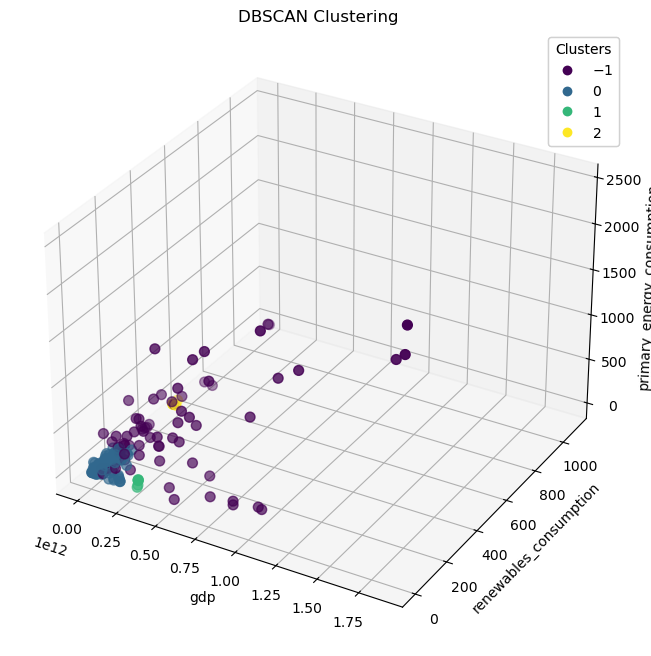

In [57]:

# features = ["gdp", "energy_per_capita", "primary_energy_consumption" , "population"]
# Aplica DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)  # Puedes ajustar eps y min_samples según tus necesidades
dbscan_labels = dbscan.fit_predict(X_scal)

# Añade las etiquetas al DataFrame original
X_with_labels = pd.DataFrame(X_, columns=['gdp', 'renewables_consumption', 'primary_energy_consumption', 'population'])
X_with_labels['Cluster'] = dbscan_labels

# Visualización de los clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_with_labels['gdp'], X_with_labels['renewables_consumption'], X_with_labels['primary_energy_consumption'],
                     c=X_with_labels['Cluster'], cmap='viridis', s=50)

ax.set_xlabel('gdp')
ax.set_ylabel('renewables_consumption')
ax.set_zlabel('primary_energy_consumption')
ax.set_title('DBSCAN Clustering')

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()
